<a href="https://colab.research.google.com/github/suryaprakash20/Internship-at-The-Sparks-Foundation/blob/main/Task_4_Exploratory_Data_Analysis_Terrorism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 4 Exploratory Data Analysis

● Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’
● As a security/defense analyst, try to find out the hot zone of terrorism.
● What all security issues and insights you can derive by EDA?● Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’
● As a security/defense analyst, try to find out the hot zone of terrorism.
● What all security issues and insights you can derive by EDA?

 -- SURYA PRAKASH .V

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [6]:
# Reading the dataset
df = pd.read_csv(r"globalterrorismdb_0718dist.csv",encoding='latin1',low_memory=False)

In [7]:
df.head() 

eventid  iyear  imonth  iday  ... INT_IDEO  INT_MISC INT_ANY  related
0  197000000001   1970       7     2  ...      0.0       0.0     0.0      NaN
1  197000000002   1970       0     0  ...      1.0       1.0     1.0      NaN
2  197001000001   1970       1     0  ...     -9.0       1.0     1.0      NaN
3  197001000002   1970       1     0  ...     -9.0       1.0     1.0      NaN
4  197001000003   1970       1     0  ...     -9.0       1.0     1.0      NaN

[5 rows x 135 columns]

In [ ]:
df.tail() # Displaying last five rows in the dataset...

eventid  iyear  imonth  iday approxdate  extended resolution  \
181686  201712310022   2017      12    31        NaN         0        NaN   
181687  201712310029   2017      12    31        NaN         0        NaN   
181688  201712310030   2017      12    31        NaN         0        NaN   
181689  201712310031   2017      12    31        NaN         0        NaN   
181690  201712310032   2017      12    31        NaN         0        NaN   

        country  country_txt  region  ... addnotes  \
181686      182      Somalia      11  ...      NaN   
181687      200        Syria      10  ...      NaN   
181688      160  Philippines       5  ...      NaN   
181689       92        India       6  ...      NaN   
181690      160  Philippines       5  ...      NaN   

                                                   scite1  \
181686  "Somalia: Al-Shabaab Militants Attack Army Che...   
181687  "Putin's 'victory' in Syria has turned into a ...   
181688  "Maguindanao clashes trap tribe members," Phil...   
181689  "Trader escapes grenade attack in Imphal," Bus...   
181690  "Security tightened in Cotabato following IED ...   

                                                   scite2  \
181686  "Highlights: Somalia Daily Media Highlights 2 ...   
181687  "Two Russian soldiers killed at Hmeymim base i...   
181688                                                NaN   
181689                                                NaN   
181690  "Security tightened in Cotabato City," Manila ...   

                                                   scite3  \
181686  "Highlights: Somalia Daily Media Highlights 1 ...   
181687  "Two Russian servicemen killed in Syria mortar...   
181688                                                NaN   
181689                                                NaN   
181690                                                NaN   

                        dbsource  INT_LOG  INT_IDEO INT_MISC INT_ANY  related  
181686  START Primary Collection        0         0        0       0      NaN  
181687  START Primary Collection       -9        -9        1       1      NaN  
181688  START Primary Collection        0         0        0       0      NaN  
181689  START Primary Collection       -9        -9        0      -9      NaN  
181690  START Primary Collection       -9        -9        0      -9      NaN  

[5 rows x 135 columns]

In [ ]:
df.columns.values  # displaying the column values of the dataset...

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [8]:
df = df[["iyear", "imonth", "iday","country", "country_txt", "region_txt", "city","success", "attacktype1_txt","nkill", "propvalue", "targtype1_txt","latitude","gname","longitude", "targsubtype1_txt","target1","weaptype1_txt", "weapdetail"]]

In [9]:
df.columns  

Index(['iyear', 'imonth', 'iday', 'country', 'country_txt', 'region_txt',
       'city', 'success', 'attacktype1_txt', 'nkill', 'propvalue',
       'targtype1_txt', 'latitude', 'gname', 'longitude', 'targsubtype1_txt',
       'target1', 'weaptype1_txt', 'weapdetail'],
      dtype='object')

In [10]:
df.rename(columns = {'iyear':'Year', "imonth":"Month","iday":"Day", "country":"Country_no",
                     "country_txt":"Country","region_txt":"Region","city":"City", "propvalue":"property_value",
                     "attacktype1_txt":"Attack_type", "targtype1_txt":"Target_type","gname":"group_name",
                     "targsubtype1_txt":"Target_sub_type", "target1":"Target", "nkill":"no_of_kills",
                     "weaptype1_txt":"Weapon_type", "weapdetail":"Weapon_detail"}, inplace = True)  # Renaming the column values...

In [11]:
df.isnull().sum()  # displaying the null values of each dataset...

Year                   0
Month                  0
Day                    0
Country_no             0
Country                0
Region                 0
City                   0
success                0
Attack_type            0
no_of_kills         5909
property_value     50221
Target_type            0
latitude            3240
group_name             1
longitude           3241
Target_sub_type     2712
Target               423
Weapon_type            1
Weapon_detail       5499
dtype: int64

In [12]:
df.shape  # displaying the number of rows and columns in the dataset

(60236, 19)

In [13]:
df["City"].fillna("Unknown", inplace = True)
df["Target"].fillna("Unknown", inplace = True)
df["property_value"].fillna(0, inplace = True)
df["no_of_kills"].fillna(0, inplace = True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60236 entries, 0 to 60235
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             60236 non-null  int64  
 1   Month            60236 non-null  int64  
 2   Day              60236 non-null  int64  
 3   Country_no       60236 non-null  int64  
 4   Country          60236 non-null  object 
 5   Region           60236 non-null  object 
 6   City             60236 non-null  object 
 7   success          60236 non-null  int64  
 8   Attack_type      60236 non-null  object 
 9   no_of_kills      60236 non-null  float64
 10  property_value   60236 non-null  float64
 11  Target_type      60236 non-null  object 
 12  latitude         56996 non-null  float64
 13  group_name       60235 non-null  object 
 14  longitude        56995 non-null  float64
 15  Target_sub_type  57524 non-null  object 
 16  Target           60236 non-null  object 
 17  Weapon_type 

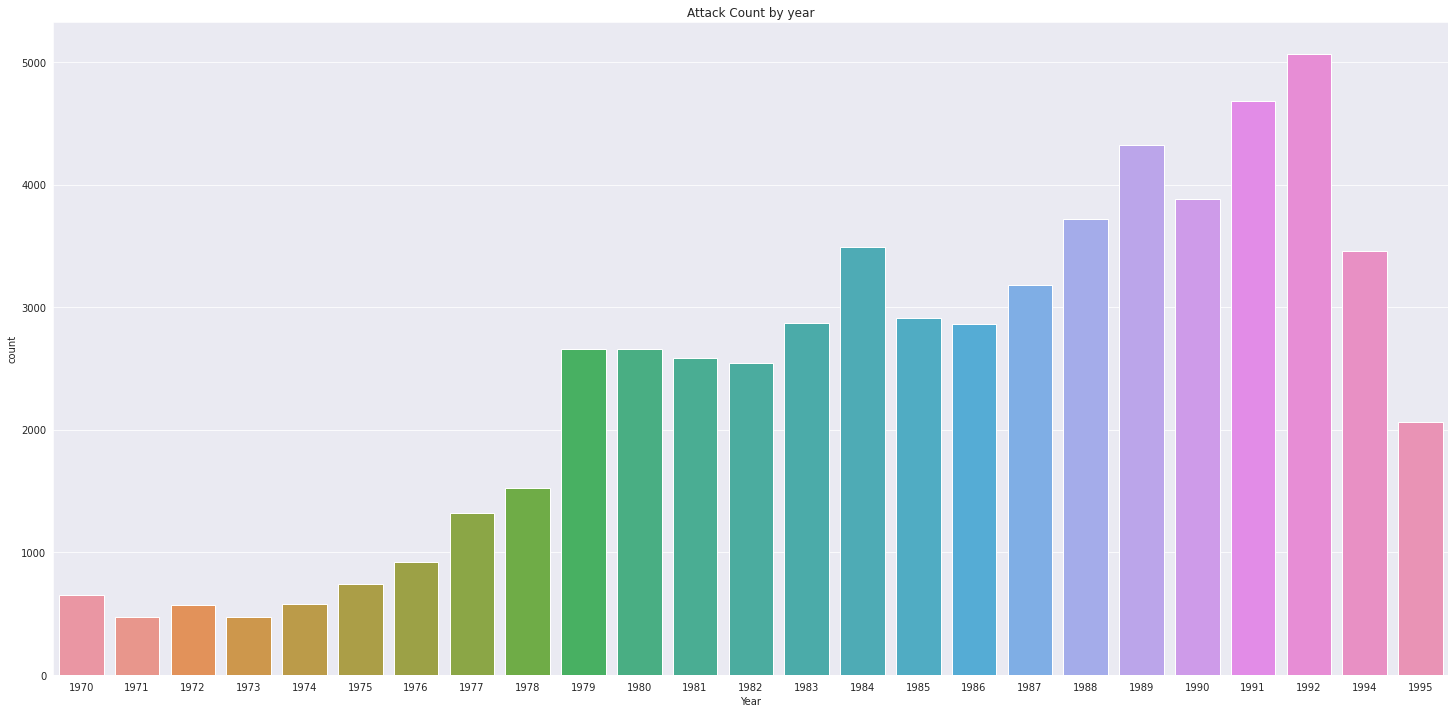

In [16]:

plt.figure(figsize=(25,12))   #  Incresing figure size...
plt.title("Attack Count by year")  # Giving title to the graph...
_=sns.countplot(x ='Year', data = df)  # Using Count Plot...

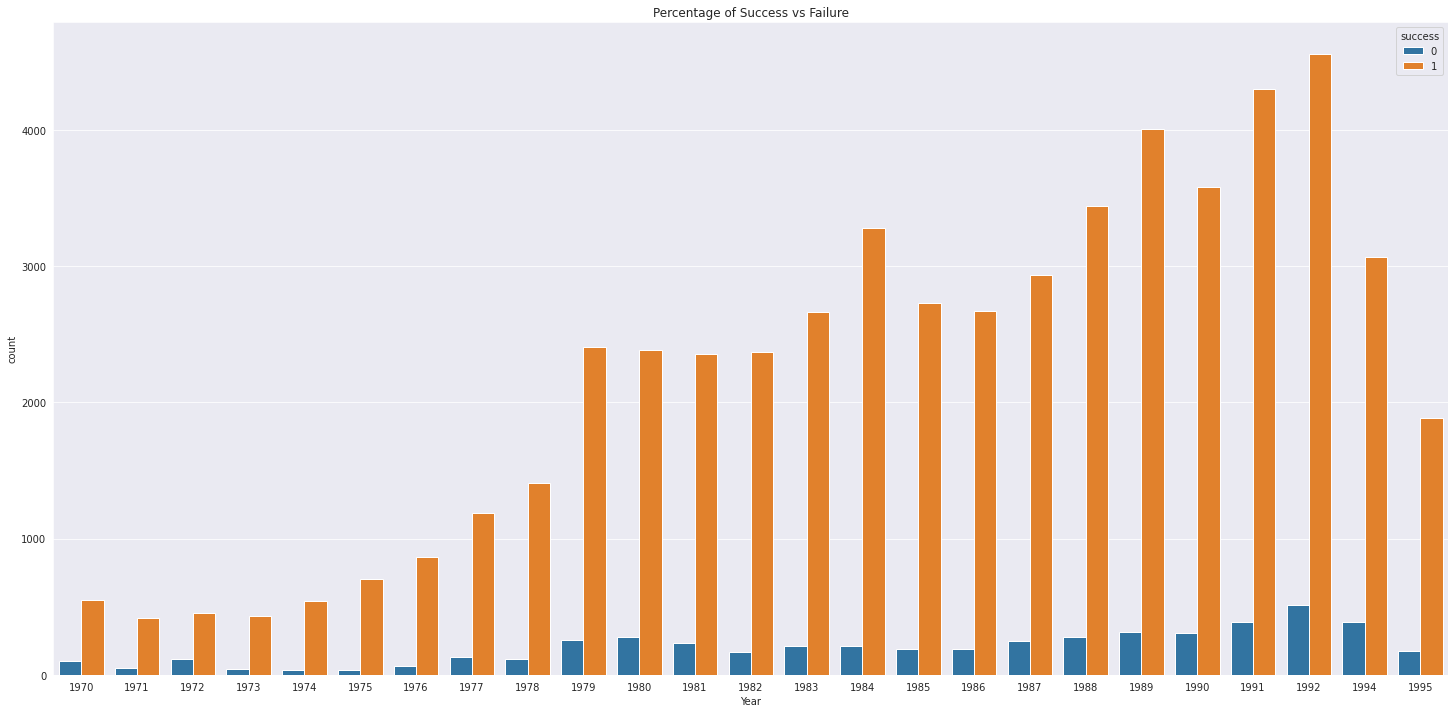

In [17]:
plt.figure(figsize=(25,12))   
plt.title("Percentage of Success vs Failure") # printing the title
sns.set_style('darkgrid')  # Making background in a stylish format
sns.countplot(x ='Year', hue = "success", data = df)  #using countplot with year and success
plt.show() # showing the plot...

Region-Wise Attack Count

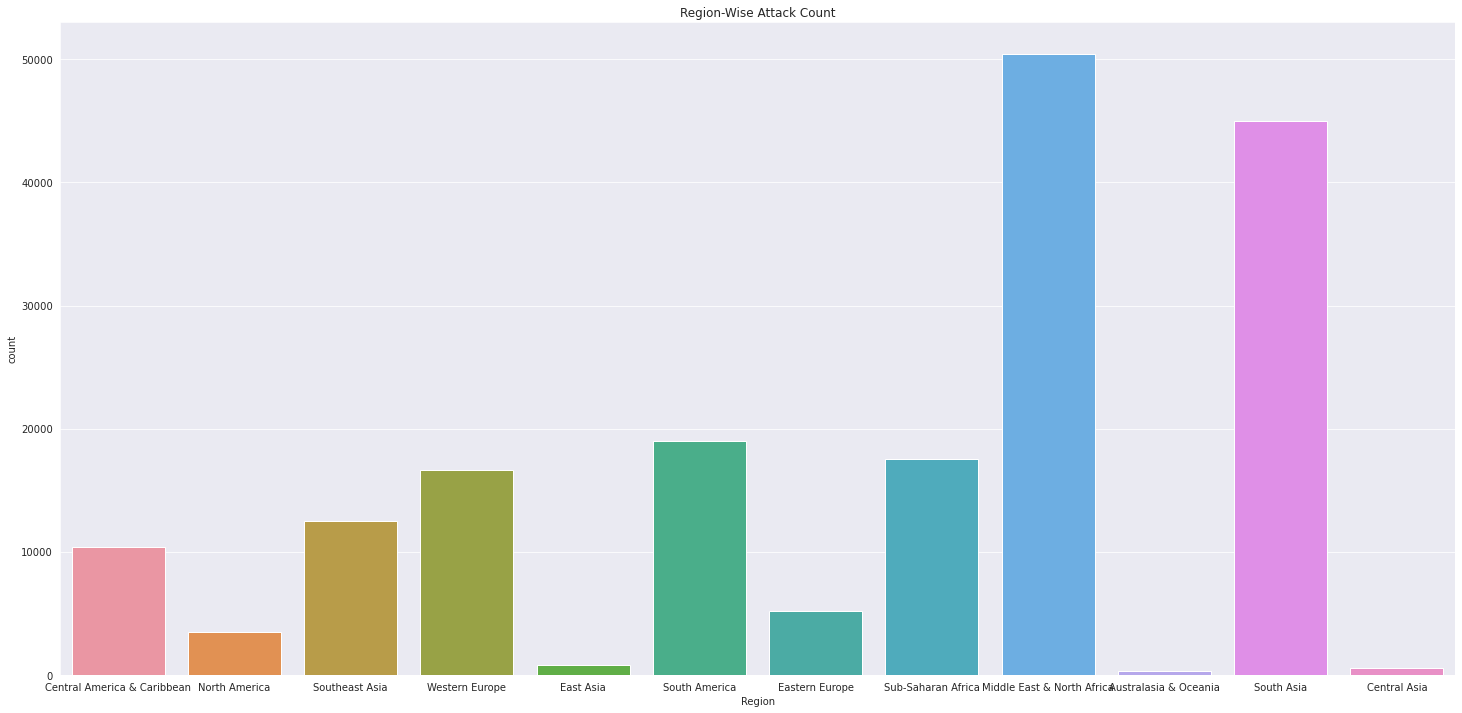

In [ ]:
plt.figure(figsize=(25,12))   #  Incresing figure size...
sns.set_style('darkgrid')
plt.title("Region-Wise Attack Count")  # Giving title to the graph...
_=sns.countplot(x ='Region', data = df)  # Using Count Plot...

In [19]:
plt.figure(figsize=(25,12))
fig = px.scatter(df, x="Year", y="Region", color="Attack_type",size="no_of_kills", hover_name="Country", log_x=True, size_max=60,title='Attack type in each region & year')
fig.show() # Scatter plot is used to determine attack type in the specified region throughout the year...

<Figure size 1800x864 with 0 Axes>

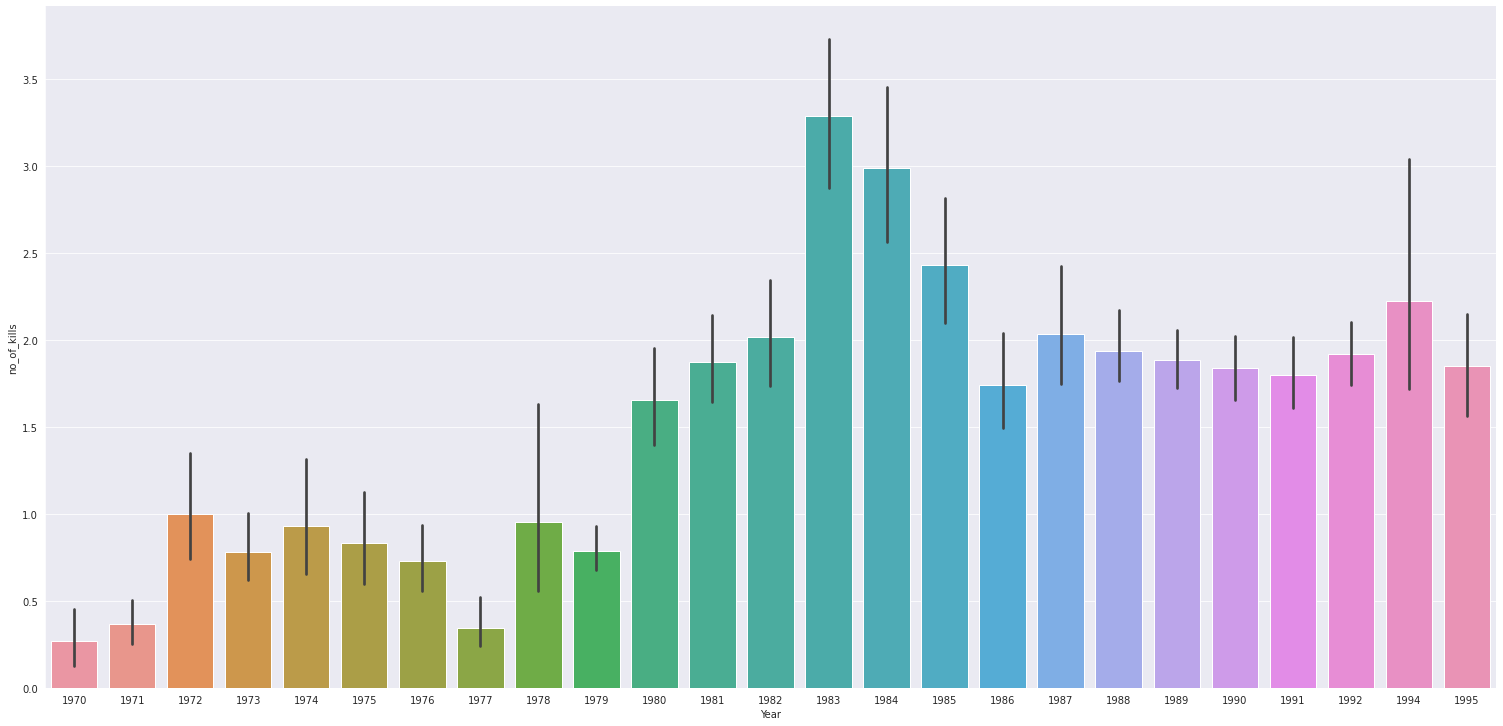

In [22]:
sns.set_style('darkgrid')
_ = sns.catplot(x ='Year', y ='no_of_kills', data = df, kind ='bar',height=10, aspect=27/13)

In [23]:
px.pie(df, values='no_of_kills', names='Attack_type', title='Number of Kills per Attack') # using piechart to display the number of kills per attack...

In [24]:
px.pie(df, values='no_of_kills', names='Weapon_type', title='Number of Kills by each Weapon') # using piechart to display the number of kills by each target

In [25]:
px.pie(df, values='no_of_kills', names='Target_type', title='Number of Kills in each target') # using piechart to display the number of kills in each target

## Conclusion:

### The maximum mumber of kills where high in the year 1998.

### The Highest number of attacks takes place in the year 2014.

### In region wise attack the Middle-East Region has a Highest attack range.

### The Highest number of Succesfull attacks takes place in the year 2014.

### In the year 2010-2020 the Hostage Taking (Barricade Incident, Kidnapping) takes place at a wider range.

### In Armed Assault the number of kills where high about 38.9%

### Using Firearms and Explosives the number of kills were high.

### In Private Citizens and property the kill rate is high